# Lanzini
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [2]:
def autocorrelation(x,size):
    autocorrelation = np.zeros(size)
    l = x.size-size
    
    x1 = np.mean(x[:l])
    x1_2 = np.mean(x[:l]**2)
    sigma = x1_2 - x1**2
    
    for t in range(size):
        x2 = np.mean(x[t:l+t])
        x3 = np.mean( x[:l]*x[t:l+t] )
        
        autocorrelation[t] = (x3 - x1*x2)/sigma
    
    return autocorrelation

In [3]:
def prog_err(M,L,U):
    U_block_errors=np.zeros(L.size)
    for l in range(L.size):
        U_block_errors[l] = (np.mean( U[:int(L[l])]**2 ) - np.mean( U[:int(L[l])] )**2)
    return U_block_errors

## Liquid Phase

### Equilibration

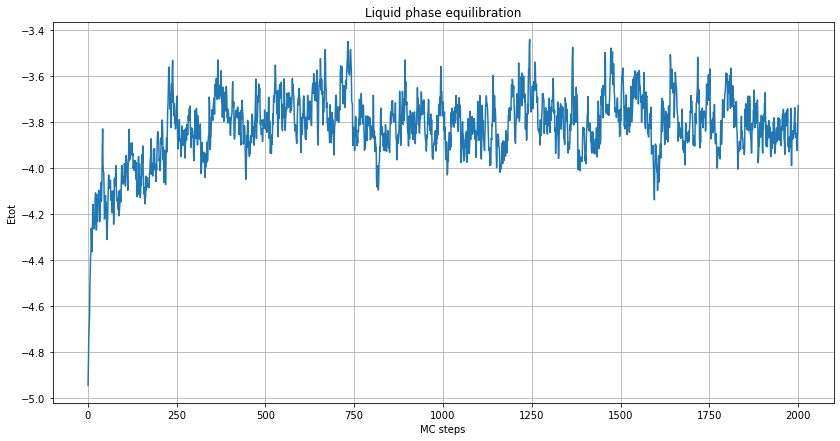

In [4]:
#eq_solid=open("equilibration solid.txt", "r")
eq_liq=open("equilibration liquid.txt", "r")
#eq_gas=open("equilibration gas.txt", "r")

fig, (ax1)=plt.subplots(1,1,figsize=(14,7))

steps_l,etot_l = np.loadtxt("equilibration liquid.txt",  usecols=(0, 1), unpack='true')
ax1.plot(steps_l, etot_l)
ax1.set_title("Liquid phase equilibration")
ax1.set_xlabel("MC steps")
ax1.set_ylabel("Etot")
ax1.grid(True)




In order to have an acceptance rate of about 50%, I set $\delta = 0.2$ for the liquid phase. After more or less 300 MC steps, the system reaches equilibrium.

In [5]:
#liquid phase---correlation with python script

epot_corr_liq=open("epot_liquid_corrf.txt", "r")
U = np.loadtxt("epot_liquid_corrf.txt",  usecols=(1), unpack='true')
corr=autocorrelation(U, 500)

#progressive error

M=500000
L=np.linspace(10, 5000, 500, dtype=int)
error=prog_err(M, L, U)

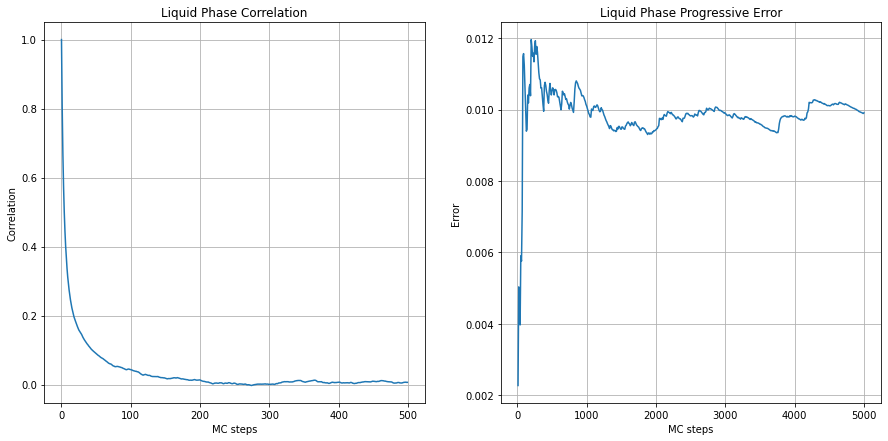

In [6]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(15, 7))

ax2.plot(corr)
ax2.set_title("Liquid Phase Correlation")
ax2.set_xlabel("MC steps")
ax2.set_ylabel("Correlation")
#ax3.set_xlim(0, 1000)
ax2.grid(True)

ax3.plot(L, error)
ax3.set_title("Liquid Phase Progressive Error")
ax3.set_xlabel("MC steps")
ax3.set_ylabel("Error")

ax3.grid(True)

Autocorrelation "disappears" after 200 MC steps. However, a good choice for the size of the block could be between 1500 and 2000, where the error tends to stabilize around 0.01 (small fluctations of the error).

## Solid Phase

### Equilibration

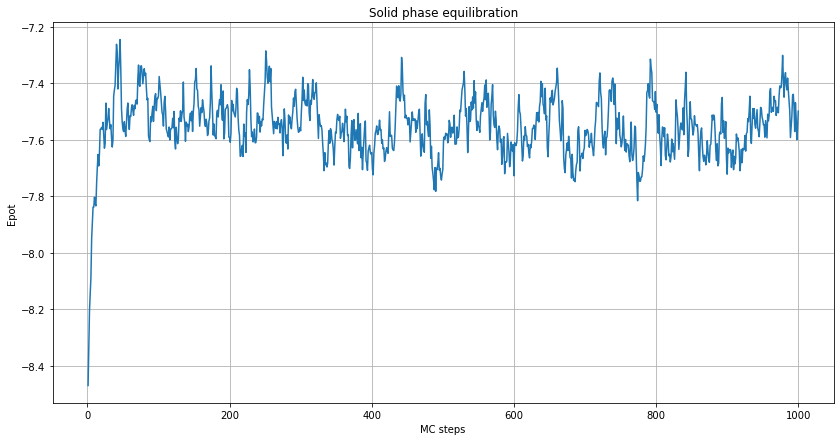

In [7]:
eq_solid=open("epot_solid_equilibration.txt", "r")


fig, (ax4)=plt.subplots(1,1,figsize=(14,7))

steps_l,etot_l = np.loadtxt("epot_solid_equilibration.txt",  usecols=(0, 1), unpack='true')
ax4.plot(steps_l, etot_l)
ax4.set_title("Solid phase equilibration")
ax4.set_xlabel("MC steps")
ax4.set_ylabel("Epot")
ax4.grid(True)

In order to have an acceptance rate of about 50%, I set $\delta = 0.12$ for the **solid phase**. After more or less 200 MC steps, the system reaches equilibrium.

In [8]:
#solid phase---correlation with python script

epot_solid_liq=open("epot_solid_corr.txt", "r")
U = np.loadtxt("epot_solid_corr.txt",  usecols=(1), unpack='true')
corr=autocorrelation(U, 500)

#progressive error

M=500000
L=np.linspace(10, 5000, 500, dtype=int)
error=prog_err(M, L, U)

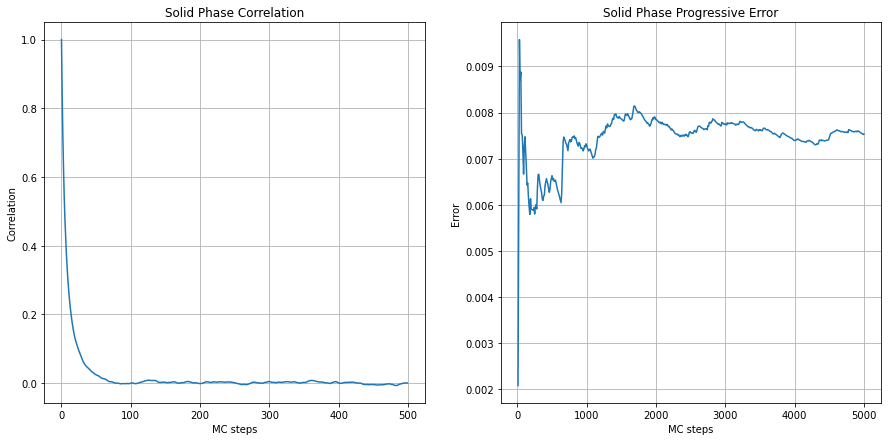

In [9]:
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 7))

ax5.plot(corr)
ax5.set_title("Solid Phase Correlation")
ax5.set_xlabel("MC steps")
ax5.set_ylabel("Correlation")
ax5.grid(True)

ax6.plot(L, error)
ax6.set_title("Solid Phase Progressive Error")
ax6.set_xlabel("MC steps")
ax6.set_ylabel("Error")
ax6.grid(True)

Autocorrelation "disappears" after 100 MC steps. However, a good choice for the size of the block could be 1500, where the error tends to stabilize around 0.0075 (small fluctations of the error).

## Gas Phase

### Equilibration

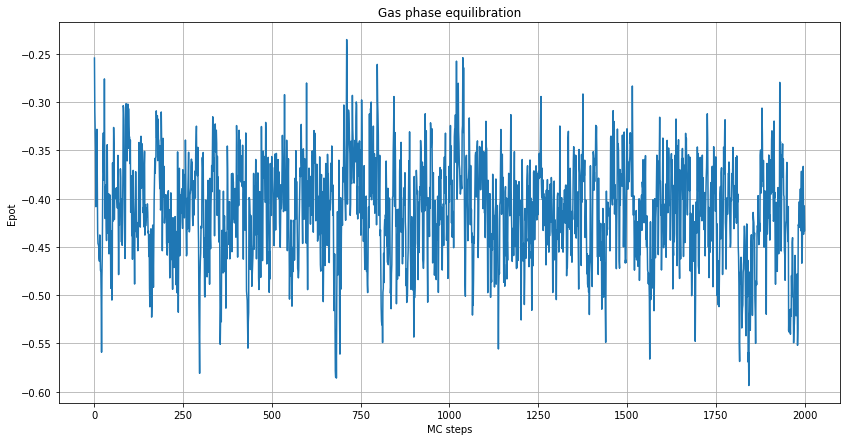

In [10]:
eq_gas=open("epot_gas_equilibration.txt", "r")


fig, (ax7)=plt.subplots(1,1,figsize=(14,7))

steps, etot = np.loadtxt("epot_gas_equilibration.txt",  usecols=(0, 1), unpack='true')
ax7.plot(steps, etot)
ax7.set_title("Gas phase equilibration")
ax7.set_xlabel("MC steps")
ax7.set_ylabel("Epot")
ax7.grid(True)

Gas phase is different from the others because of the high value of **rcut**. Because of that, the acceptance ratio doesn't descend below **0.6** . Here I used $\delta = 5$. The system looks equilibrated after few steps.

In [11]:
#Gas phase---correlation with python script

epot_corr_gas=open("epot_gas_corr.txt", "r")
U = np.loadtxt("epot_gas_corr.txt",  usecols=(1), unpack='true')
corr=autocorrelation(U, 500)

#progressive error

M=500000
L=np.linspace(10, 5000, 500, dtype=int)
error=prog_err(M, L, U)

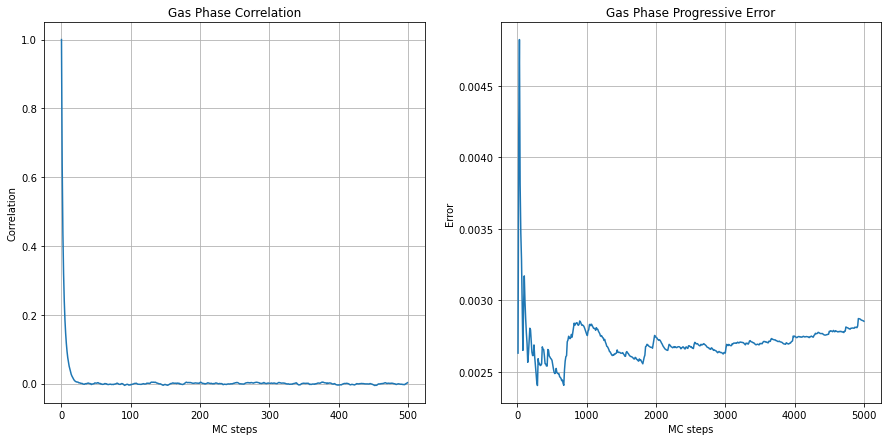

In [12]:
fig, (ax8, ax9) = plt.subplots(1, 2, figsize=(15, 7))

ax8.plot(corr)
ax8.set_title("Gas Phase Correlation")
ax8.set_xlabel("MC steps")
ax8.set_ylabel("Correlation")
ax8.grid(True)

ax9.plot(L, error)
ax9.set_title("Gas Phase Progressive Error")
ax9.set_xlabel("MC steps")
ax9.set_ylabel("Error")
ax9.grid(True)

Autocorrelation "disappears" after few MC steps. However, a good choice for the size of the block could be 2000, where the error tends to stabilize around 0.0027 (small fluctations of the error).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

## Solid Phase
#### $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$), nblocks = 50 of Nstep = 1500

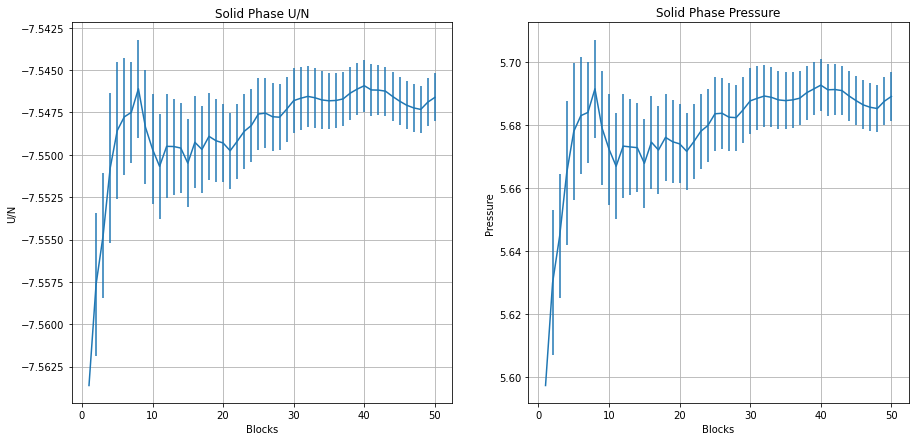

In [13]:
fig, (ax12, ax13) = plt.subplots(1, 2, figsize=(15, 7))

Solid_U=open("epot_solid_blocks.txt", "r")
Solid_pres=open("pressure_solid_blocks.txt", "r")


blocks, U, error_U = np.loadtxt("epot_solid_blocks.txt", usecols=(0, 2, 3), unpack=True, delimiter=' ')
pressure, error_p = np.loadtxt("pressure_solid_blocks.txt", usecols=(2, 3), unpack=True, delimiter=' ')


ax12.errorbar(blocks, U, error_U, label='Monte Carlo')

ax12.set_title("Solid Phase U/N")
ax12.set_xlabel("Blocks")
ax12.set_ylabel("U/N")
ax12.grid(True)

ax13.errorbar(blocks, pressure, error_p, label='Monte Carlo')

ax13.set_title("Solid Phase Pressure")
ax13.set_xlabel("Blocks")
ax13.set_ylabel("Pressure")
ax13.grid(True)

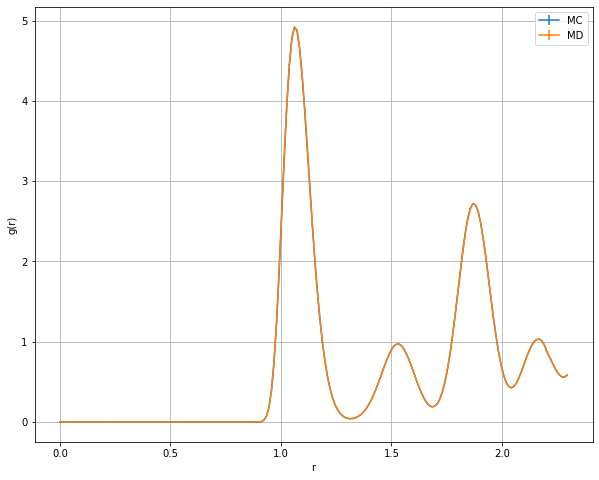

In [14]:
Solid_g=open("dis_func_solid_final.txt", "r")
MdSolid_g=open("MD_dis_func_solid.txt", "r")

x, g, error_g=np.loadtxt("dis_func_solid_final.txt", usecols=(0,1,2), unpack=True, delimiter=' ')
xMD, gMD, error_gMD=np.loadtxt("dis_func_solid_final.txt", usecols=(0,1,2), unpack=True, delimiter=' ')

plt.figure(figsize=(10, 8))
plt.errorbar(x, g, error_g, label='MC')
plt.errorbar(xMD, gMD, error_gMD, label='MD')
plt.grid(True)
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.show()

## Liquid Phase
#### $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$), nblocks = 50 of Nstep = 1500

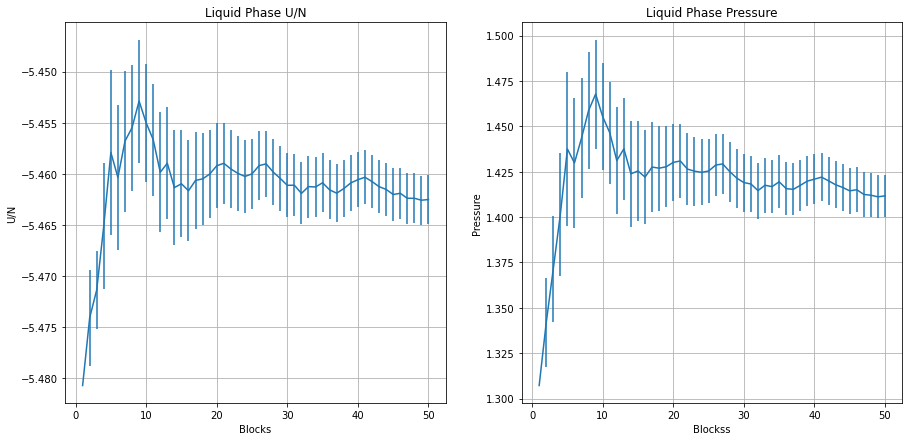

In [15]:
fig, (ax10, ax11) = plt.subplots(1, 2, figsize=(15, 7))

Liquid_U=open("epot_liquid_blocks.txt", "r")
Liquid_pres=open("pressure_liquid_blocks.txt", "r")

blocks, U, error_U = np.loadtxt("epot_liquid_blocks.txt", usecols=(0, 2, 3), unpack=True, delimiter=' ')
pressure, error_p = np.loadtxt("pressure_liquid_blocks.txt", usecols=(2, 3), unpack=True, delimiter=' ')

ax10.errorbar(blocks, U, error_U)
ax10.set_title("Liquid Phase U/N")
ax10.set_xlabel("Blocks")
ax10.set_ylabel("U/N")
ax10.grid(True)

ax11.errorbar(blocks, pressure, error_p)
ax11.set_title("Liquid Phase Pressure")
ax11.set_xlabel("Blockss")
ax11.set_ylabel("Pressure")
ax11.grid(True)

#### Distribution Function

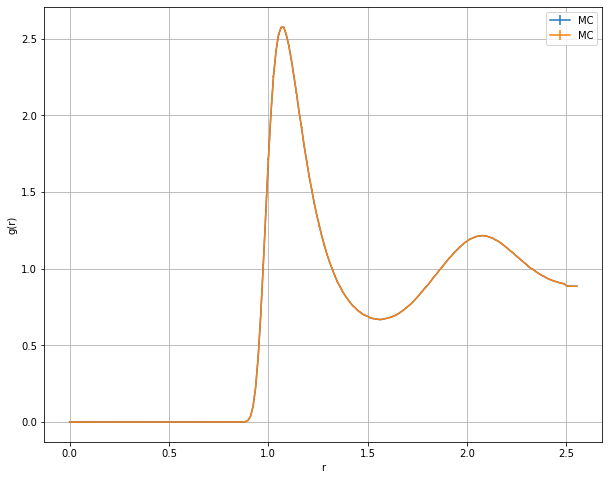

In [16]:
Liquid_g=open("dis_func_liquid_final.txt", "r")
MdLiquid_g=open("MD_dis_func_liquid.txt", "r")
               
x, g, error_g=np.loadtxt("dis_func_liquid_final.txt", usecols=(0,1,2), unpack=True, delimiter=' ')
xMD, gMD, error_gMD=np.loadtxt("dis_func_liquid_final.txt", usecols=(0,1,2), unpack=True, delimiter=' ')

plt.figure(figsize=(10, 8))
plt.errorbar(x, g, error_g, label='MC')
plt.errorbar(xMD, gMD, error_gMD, label='MC')
plt.grid(True)
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.show()

## Gas Phase
#### $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5$), nblocks = 40 of Nstep = 2000

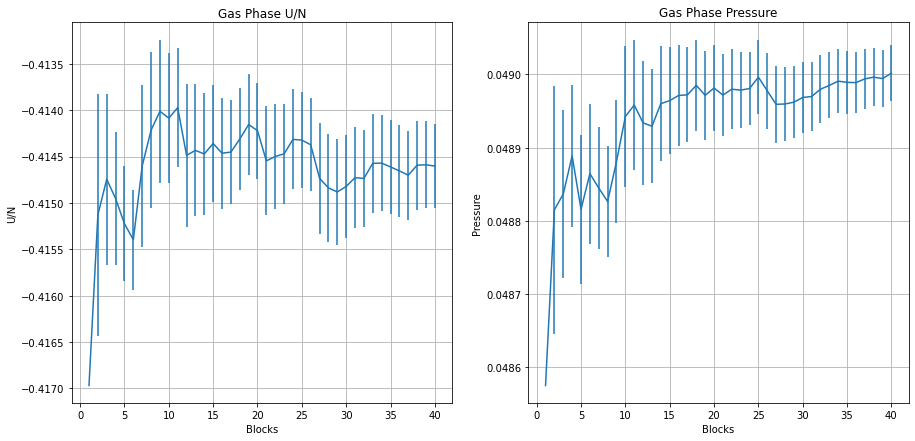

In [17]:
fig, (ax14, ax15) = plt.subplots(1, 2, figsize=(15, 7))

Gas_U=open("epot_gas_blocks.txt", "r")
Gas_pres=open("pressure_gas_blocks.txt", "r")

blocks, U, error_U = np.loadtxt("epot_gas_blocks.txt", usecols=(0, 2, 3), unpack=True, delimiter=' ')
pressure, error_p = np.loadtxt("pressure_gas_blocks.txt", usecols=(2, 3), unpack=True, delimiter=' ')

ax14.errorbar(blocks, U, error_U)
ax14.set_title("Gas Phase U/N")
ax14.set_xlabel("Blocks")
ax14.set_ylabel("U/N")
ax14.grid(True)

ax15.errorbar(blocks, pressure, error_p)
ax15.set_title("Gas Phase Pressure")
ax15.set_xlabel("Blocks")
ax15.set_ylabel("Pressure")
ax15.grid(True)

#### Distribution Function

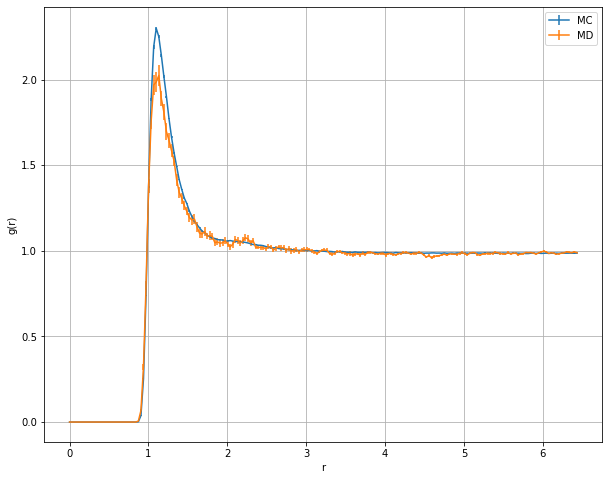

In [18]:
Gas_g=open("dis_func_gas_final.txt", "r")
Gas_gMD=open("MD_dis_func_gas.txt", "r")

x, g, error_g=np.loadtxt("dis_func_gas_final.txt", usecols=(0,1,2), unpack=True, delimiter=' ')
xMD, gMD, error_gMD=np.loadtxt("MD_dis_func_gas.txt", usecols=(0,1,2), unpack=True, delimiter=' ')

plt.figure(figsize=(10, 8))
plt.errorbar(x, g, error_g, label='MC')
plt.errorbar(xMD, gMD, error_gMD, label='MD')
plt.legend()
plt.xlabel("r")
plt.ylabel("g(r)")
plt.grid(True)
plt.show()

## Conclusions on Distribution Function

In all the three cases (solid, liquid, gas) there is an almost perfect agreement between MD and MC **g(r)**.

1. **Solid Phase:** In this case df shows three pics at $r=1, \sqrt{2}, \sqrt{3}$. 
2. **Liquid Phase** is less organized than the solid one. It shows a distinct pic only at $r=1$. For higher distances, g(r) oscillaes around 1
3. **Gas phase**: MD g(r) is more noisy. Moreover, its pic is a little lower than MC distribution function. Gas phase appears disordered.